In [ ]:
import argparse
import numpy as np
from time import time
from data_loader import load_data
from train import train
import tensorflow as tf

np.random.seed(555)

In [2]:
parser = argparse.ArgumentParser()

# movie
'''
parser.add_argument('--dataset', type=str, default='movie', help='which dataset to use')
parser.add_argument('--aggregator', type=str, default='sum', help='which aggregator to use')
parser.add_argument('--n_epochs', type=int, default=10, help='the number of epochs')
parser.add_argument('--neighbor_sample_size', type=int, default=4, help='the number of neighbors to be sampled')
parser.add_argument('--dim', type=int, default=32, help='dimension of user and entity embeddings')
parser.add_argument('--n_iter', type=int, default=2, help='number of iterations when computing entity representation')
parser.add_argument('--batch_size', type=int, default=65536, help='batch size')
parser.add_argument('--l2_weight', type=float, default=1e-7, help='weight of l2 regularization')
parser.add_argument('--lr', type=float, default=2e-2, help='learning rate')
parser.add_argument('--ratio', type=float, default=1, help='size of training dataset')
'''

'''
# book
parser.add_argument('--dataset', type=str, default='book', help='which dataset to use')
parser.add_argument('--aggregator', type=str, default='sum', help='which aggregator to use')
parser.add_argument('--n_epochs', type=int, default=10, help='the number of epochs')
parser.add_argument('--neighbor_sample_size', type=int, default=8, help='the number of neighbors to be sampled')
parser.add_argument('--dim', type=int, default=64, help='dimension of user and entity embeddings')
parser.add_argument('--n_iter', type=int, default=3, help='number of iterations when computing entity representation')
parser.add_argument('--batch_size', type=int, default=256, help='batch size')
parser.add_argument('--l2_weight', type=float, default=2e-5, help='weight of l2 regularization')
parser.add_argument('--lr', type=float, default=2e-4, help='learning rate')
parser.add_argument('--ratio', type=float, default=1, help='size of training dataset')
'''

# music
parser.add_argument('--dataset', type=str, default='music', help='which dataset to use')
parser.add_argument('--aggregator', type=str, default='neighbor', help='which aggregator to use')
parser.add_argument('--n_epochs', type=int, default=10, help='the number of epochs')
parser.add_argument('--neighbor_sample_size', type=int, default=8, help='the number of neighbors to be sampled')
parser.add_argument('--dim', type=int, default=16, help='dimension of user and entity embeddings')
parser.add_argument('--n_iter', type=int, default=1, help='number of iterations when computing entity representation')
parser.add_argument('--batch_size', type=int, default=128, help='batch size')
parser.add_argument('--l2_weight', type=float, default=1e-4, help='weight of l2 regularization')
parser.add_argument('--lr', type=float, default=5e-4, help='learning rate')
parser.add_argument('--ratio', type=float, default=1, help='size of training dataset')


show_loss = False
show_time = False
show_topk = False

args = parser.parse_args([])


In [4]:
data = load_data(args)

reading rating file ...
splitting dataset ...
reading KG file ...
constructing knowledge graph ...
constructing adjacency matrix ...
data loaded.



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
dim is deprecated, use axis instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
epoch 0    train auc: 0.5135  f1: 0.5149    eval auc: 0.4856  f1: 0.4923    test auc: 0.4913  f1: 0.5004
epoch 1    train auc: 0.4868  f1: 0.4932    eval auc: 0.5172  f1: 0.5141    test auc: 0.5280  f1: 0.5218
epoch 2    train auc: 0.5261  f1: 0.5199    eval auc: 0.4496  f1: 0.4626    test auc: 0.4604  f1: 0.4678
epoch 3    train auc: 0.4820  f1: 0.4908    eval auc: 0.5256  f1: 0.5248    test auc: 0.5273  f1: 0.5239
epoch 4    train auc: 0.5020  f1: 0.4933    ev

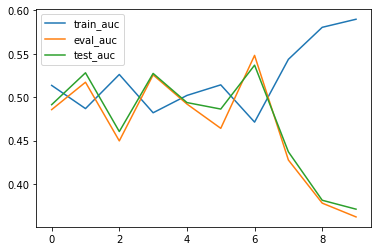

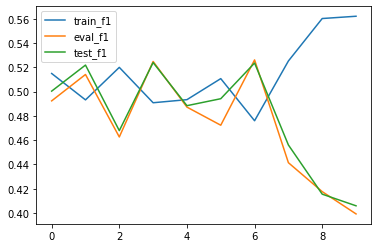

In [5]:
list_train_auc, list_train_f1, list_eval_auc, list_eval_f1, list_test_auc, list_test_f1 = train(args, data, show_loss, show_topk)

#plot the results
import matplotlib.pyplot as plt
plt.plot(list_train_auc, label='train_auc')
plt.plot(list_eval_auc, label='eval_auc')
plt.plot(list_test_auc, label='test_auc')
plt.legend()
plt.show()

plt.plot(list_train_f1, label='train_f1')
plt.plot(list_eval_f1, label='eval_f1')
plt.plot(list_test_f1, label='test_f1')
plt.legend()
plt.show()
